In [1]:
'''
Read reviews from a JSON-formatted file into an array.
'''
import json
import string
import re
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score
# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

lines = [];
num_pos = 0;
num_neg = 0;
num_total = 75000;

with open('data/yelp_academic_dataset_review.json', 'r',encoding='utf8') as f:
    for line in f:
        if (len(lines) >= (num_total * 2)):
            break;

        json_info = json.loads(line);

        if json_info['stars'] > 3:
            if num_pos > num_total:
                continue;
            num_pos = num_pos + 1;
        elif json_info['stars'] < 3:
            if num_neg > num_total:
                continue;
            num_neg = num_neg + 1;
        else:
            continue;

        lines.append(json.loads(line));

'''
Separate line data into reviews and labels
'''
reviews = [line['text'] for line in lines];

stars = [line['stars'] for line in lines];
labels = ['1' if star > 3 else '0' for star in stars];

'''
Clean each document by removing unnecesary characters and splitting by space.
'''

Using TensorFlow backend.


'\nClean each document by removing unnecesary characters and splitting by space.\n'

In [2]:
print(reviews[0])
print(stars[0])
print(labels[0])

The pizza was okay. Not the best I've had. I prefer Biaggio's on Flamingo / Fort Apache. The chef there can make a MUCH better NY style pizza. The pizzeria @ Cosmo was over priced for the quality and lack of personality in the food. Biaggio's is a much better pick if youre going for italian - family owned, home made recipes, people that actually CARE if you like their food. You dont get that at a pizzeria in a casino. I dont care what you say...
2
0


In [3]:
def clean_document1(doco):
    punctuation = string.punctuation + '\n\n';
    punc_replace = ''.join([' ' for s in punctuation]);
    doco_clean = doco.replace('-', ' ');
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace);
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')]);
    doco_clean = doco_clean.split(' ');
    doco_clean = [word.lower() for word in doco_clean if len(word) > 0];

    return doco_clean;


In [8]:
# Generate a cleaned reviews array from original review texts
review_cleans = [clean_document1(doc) for doc in reviews];
' '.join(review_cleans[0])

'the pizza was okay not the best i ve had i prefer biaggio s on flamingo fort apache the chef there can make a much better ny style pizza the pizzeria cosmo was over priced for the quality and lack of personality in the food biaggio s is a much better pick if youre going for italian family owned home made recipes people that actually care if you like their food you dont get that at a pizzeria in a casino i dont care what you say'

In [14]:
stopwords = {'a',
 'ain',
 'am',
 'an',
 'and',
 'any', 
 'as',
 'at',
 'be',
 'been',
 'being',
 'by',
 'd',
 'during',
 'each',
 'for',
 'from',
 'further',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'my',
 'myself',
 'now',
 'o',
 'of',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'she',
 "she's",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 've',
 'we',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}

def clean_document2(doco):
    ## Remove stop words
    doco = [w for w in doco if not w in stopwords]
    
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in doco]

    return doco

In [17]:
review_cleans2 = [clean_document2(doc) for doc in review_cleans];
review_cleans = review_cleans2
' '.join(review_cleans[0])

'pizza was okay not best had prefer biaggio flamingo fort apache chef can make much better ny style pizza pizzeria cosmo was priced quality lack personality food biaggio is much better pick youre going italian family owned home made recipes people actually care like food dont get pizzeria casino dont care say'

In [18]:
sentences = [' '.join(r) for r in review_cleans]
sentences[0]

'pizza was okay not best had prefer biaggio flamingo fort apache chef can make much better ny style pizza pizzeria cosmo was priced quality lack personality food biaggio is much better pick youre going italian family owned home made recipes people actually care like food dont get pizzeria casino dont care say'

In [19]:
# Use a Keras Tokenizer and fit on the sentences
tokenizer = Tokenizer();
tokenizer.fit_on_texts(sentences);
reviews_encoded = np.array(tokenizer.texts_to_sequences(sentences));
' '.join(map(str,reviews_encoded[0]))

'116 1 461 4 53 7 1484 20912 4351 6184 7241 584 27 65 67 73 2100 536 116 4651 5383 1 542 151 738 2447 10 20912 3 67 73 396 7518 60 683 209 1479 131 69 4668 55 216 165 21 10 849 20 4651 933 849 165 93'

In [20]:
sequence_dict = tokenizer.word_index;
# reverse - index to word
word_dict = dict((num, val) for (val, num) in sequence_dict.items());

In [21]:
#for i,(a,b) in enumerate(zip(reviews_encoded,text_sequences)):
#    if (a!=b):
#        print(review_cleans[i])

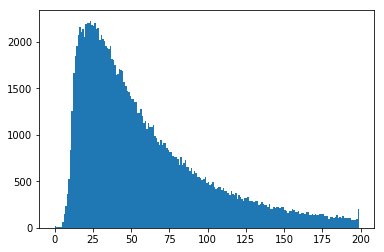

In [22]:
# Plot a Histogram of length of reviews
lengths = [len(x) for x in reviews_encoded];
plt.hist(lengths, bins=range(200))
plt.show()

In [23]:
# Truncate and Pad reviews at a Maximum cap of 60 words.
max_cap = 60;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')

In [28]:
' '.join(list(map(lambda x: word_dict[x] if x>0 else '0', X[0])))

'0 0 0 0 0 0 0 0 pizza was okay not best had prefer biaggio flamingo fort apache chef can make much better ny style pizza pizzeria cosmo was priced quality lack personality food biaggio is much better pick youre going italian family owned home made recipes people actually care like food dont get pizzeria casino dont care say'

In [29]:
# Obtain a One-hot Y array for each review label.
Y = np.array([[0,1] if '0' in label else [1,0] for label in labels])

Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [30]:
# Get a randomized sequence of positions to shuffle reviews
np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

# Shuffle X and Y
X = X[random_posits];
Y = Y[random_posits];

In [31]:
# Divide the reviews into Training, Dev, and Test data.
train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));

X_train, Y_train = X[:train_cap], Y[:train_cap];
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap];
X_test, Y_test = X[dev_cap:], Y[dev_cap:]


In [32]:
model = Sequential();
model.add(Embedding(len(word_dict)+1, max_cap, input_length=max_cap));
model.add(LSTM(100, return_sequences=True));
model.add(LSTM(100));
model.add(Dense(100, activation='relu'));
model.add(Dense(2, activation='softmax'));
print(model.summary());

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 60)            5960760   
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 100)           64400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 6,115,862
Trainable params: 6,115,862
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [35]:
optimizer = Adam(lr=0.001, decay=0.0001);
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model
history = model.fit(X_train, Y_train, batch_size=128, epochs=3, validation_data=(X_dev, Y_dev))


Train on 127500 samples, validate on 12000 samples
Epoch 1/3
127500/127500 [==============================] - 237s 2ms/step - loss: 0.2165 - acc: 0.9126 - val_loss: 0.1918 - val_acc: 0.9312
Epoch 2/3
127500/127500 [==============================] - 240s 2ms/step - loss: 0.1275 - acc: 0.9523 - val_loss: 0.1810 - val_acc: 0.9322
Epoch 3/3
127500/127500 [==============================] - 232s 2ms/step - loss: 0.0862 - acc: 0.9682 - val_loss: 0.1823 - val_acc: 0.9353


In [36]:
# Obtain predictions
predictions = model.predict_classes(X_test)

# Convert Y_test to the same format as predictions
actuals = [0 if y[0] == 1 else 1 for y in Y_test];

# Use SkLearn's Metrics module
accuracy_score(predictions, actuals)

0.9371428571428572

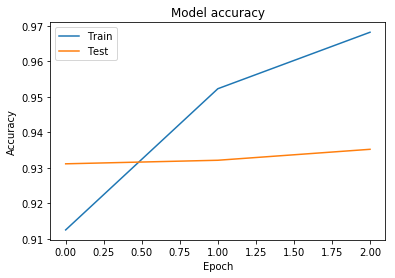

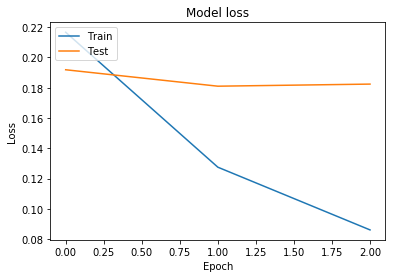

In [37]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()